British Airways Customer Booking Prediction
Author: VEMAPURAM SANJEEVI SAI TEJESWAR REDDY
Date: November 13, 2025
Objective: Predict customer booking behavior using machine learning

Project Overview
This notebook contains the complete analysis for the British Airways Data Science Job Simulation on Forage.

Goals:
Analyze 50,000 customer booking records

Build a predictive model to understand booking behavior

Identify key factors influencing booking decisions

Provide actionable business recommendations

Dataset:
Records: 50,000 customer bookings

Features: 14 variables (numeric + categorical)

Target: booking_complete (0 = Not Booked, 1 = Booked)

Model:
Algorithm: Random Forest Classifier

Objective: Predict which customers will complete their booking

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [14]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [23]:
# Navigate to the project folder (correct path)
project_path = r"C:\Users\Sai Tejeswar\Documents\british airways"
os.chdir(project_path)

print(f"✅ Changed to project directory")
print(f"Current Directory: {os.getcwd()}")
print(f"\nFiles in project folder:")
print(os.listdir())

# Load the dataset
df = pd.read_csv("data/customer_booking.csv", encoding='latin-1')

# Display dataset information
print(f"\n✅ Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print("\n" + "="*60)
print("First 5 rows:")
print("="*60)
df.head()


✅ Changed to project directory
Current Directory: C:\Users\Sai Tejeswar\Documents\british airways

Files in project folder:
['.git', '.gitignore', '.vscode', 'data', 'LICENSE', 'notebooks', 'presentation', 'README.md', 'requirements.txt', 'visualizations']

✅ Dataset loaded successfully!
Dataset Shape: (50000, 14)
Total Records: 50,000
Total Features: 14

First 5 rows:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [24]:
# Dataset information
print("Dataset Information:")
print("="*60)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5

In [25]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing Values per Column:")
print("="*60)
print(missing_values)
print(f"\nTotal missing values in dataset: {missing_values.sum()}")


Missing Values per Column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Total missing values in dataset: 0


In [26]:
# Descriptive statistics
print("Descriptive Statistics:")
print("="*60)
df.describe()


Descriptive Statistics:


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [27]:
# Check unique values for each column
print("Unique Values per Column:")
print("="*60)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")


Unique Values per Column:
num_passengers: 9 unique values
sales_channel: 2 unique values
trip_type: 3 unique values
purchase_lead: 470 unique values
length_of_stay: 335 unique values
flight_hour: 24 unique values
flight_day: 7 unique values
route: 799 unique values
booking_origin: 104 unique values
wants_extra_baggage: 2 unique values
wants_preferred_seat: 2 unique values
wants_in_flight_meals: 2 unique values
flight_duration: 21 unique values
booking_complete: 2 unique values


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [30]:
df.describe()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [31]:
df.isnull().sum()


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [32]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


num_passengers: 9 unique values
sales_channel: 2 unique values
trip_type: 3 unique values
purchase_lead: 470 unique values
length_of_stay: 335 unique values
flight_hour: 24 unique values
flight_day: 7 unique values
route: 799 unique values
booking_origin: 104 unique values
wants_extra_baggage: 2 unique values
wants_preferred_seat: 2 unique values
wants_in_flight_meals: 2 unique values
flight_duration: 21 unique values
booking_complete: 2 unique values


In [33]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col} ({len(unique_vals)} unique values):")
    print(unique_vals[:10])  # Display first 10 unique values for brevity
    print()


sales_channel (2 unique values):
['Internet' 'Mobile']

trip_type (3 unique values):
['RoundTrip' 'CircleTrip' 'OneWay']

flight_day (7 unique values):
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']

route (799 unique values):
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG']

booking_origin (104 unique values):
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany']



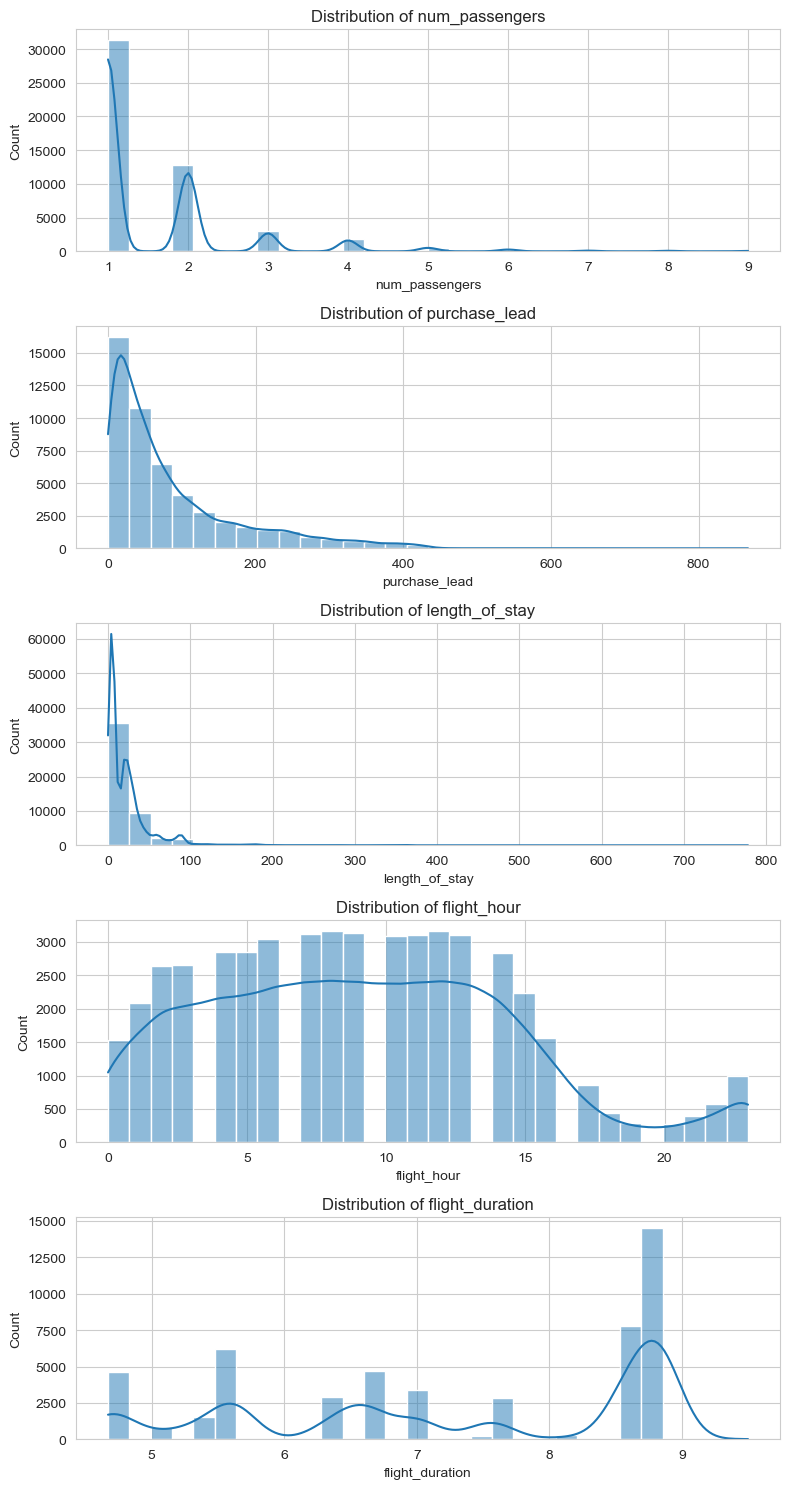

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 15))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [35]:
from sklearn.preprocessing import OneHotEncoder

# Simple one-hot encoding for low-cardinality variables
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day'], drop_first=True)

# Frequency encoding for high-cardinality columns
for col in ['route', 'booking_origin']:
    freq = df[col].value_counts()
    df[col + '_freq'] = df[col].map(freq)
    df = df.drop(col, axis=1)


In [36]:
import numpy as np

for col in ['purchase_lead', 'length_of_stay']:
    df[col + '_log'] = np.log1p(df[col])


In [37]:
print(df.columns)


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed', 'route_freq', 'booking_origin_freq',
       'purchase_lead_log', 'length_of_stay_log'],
      dtype='object')


In [38]:
print(df.columns)


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed', 'route_freq', 'booking_origin_freq',
       'purchase_lead_log', 'length_of_stay_log'],
      dtype='object')


In [39]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Cross-validation (optional but recommended)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", scores.mean())


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.63      0.09      0.16      1496

    accuracy                           0.86     10000
   macro avg       0.74      0.54      0.54     10000
weighted avg       0.83      0.86      0.81     10000

[[8422   82]
 [1359  137]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)
features = np.array(X.columns)

plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.barh(features[indices], importances[indices], align='center')
plt.xlabel("Importance")
plt.show()
